<a href="https://colab.research.google.com/github/yashhhp/Spotify-Popularity-Prediction-using-XGBoost/blob/main/Spotify_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About data:**

---


# **Content:**
This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with it. The data is in CSV format which is tabular and can be loaded quickly.
 
# **Column Description:**
**track_id:** The Spotify ID for the track

**artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a;

**album_name:** The album name in which the track appears

**track_name:** Name of the track

**popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

**duration_ms:** The track length in milliseconds

**explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

**loudness:** The overall loudness of a track in decibels (dB)

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
track_genre: The genre in which the track belongs






# Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed
from datetime import datetime


# Reading the dataset

In [ ]:
df=pd.read_csv('/content/spotify.csv')
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

# Information about dataset

In [ ]:
#checking for null values
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
#drop useless columnsdf
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace = True)

In [ ]:
print(df.shape)
df.info()

(114000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool

# Data pre-processing

In [ ]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df
df = labelencoder(df)


popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre  
0   87.917               4            0  
1   77.489               4            0  
2   76.332               4            0  
3  181.740               3            0  
4  119.949               4            0

In [ ]:

df.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre  
0   87.917               4            0  
1   77.489               4            0  
2   76.332               4            0  
3  181.740               3            0  
4  119.949               4            0

# EDA

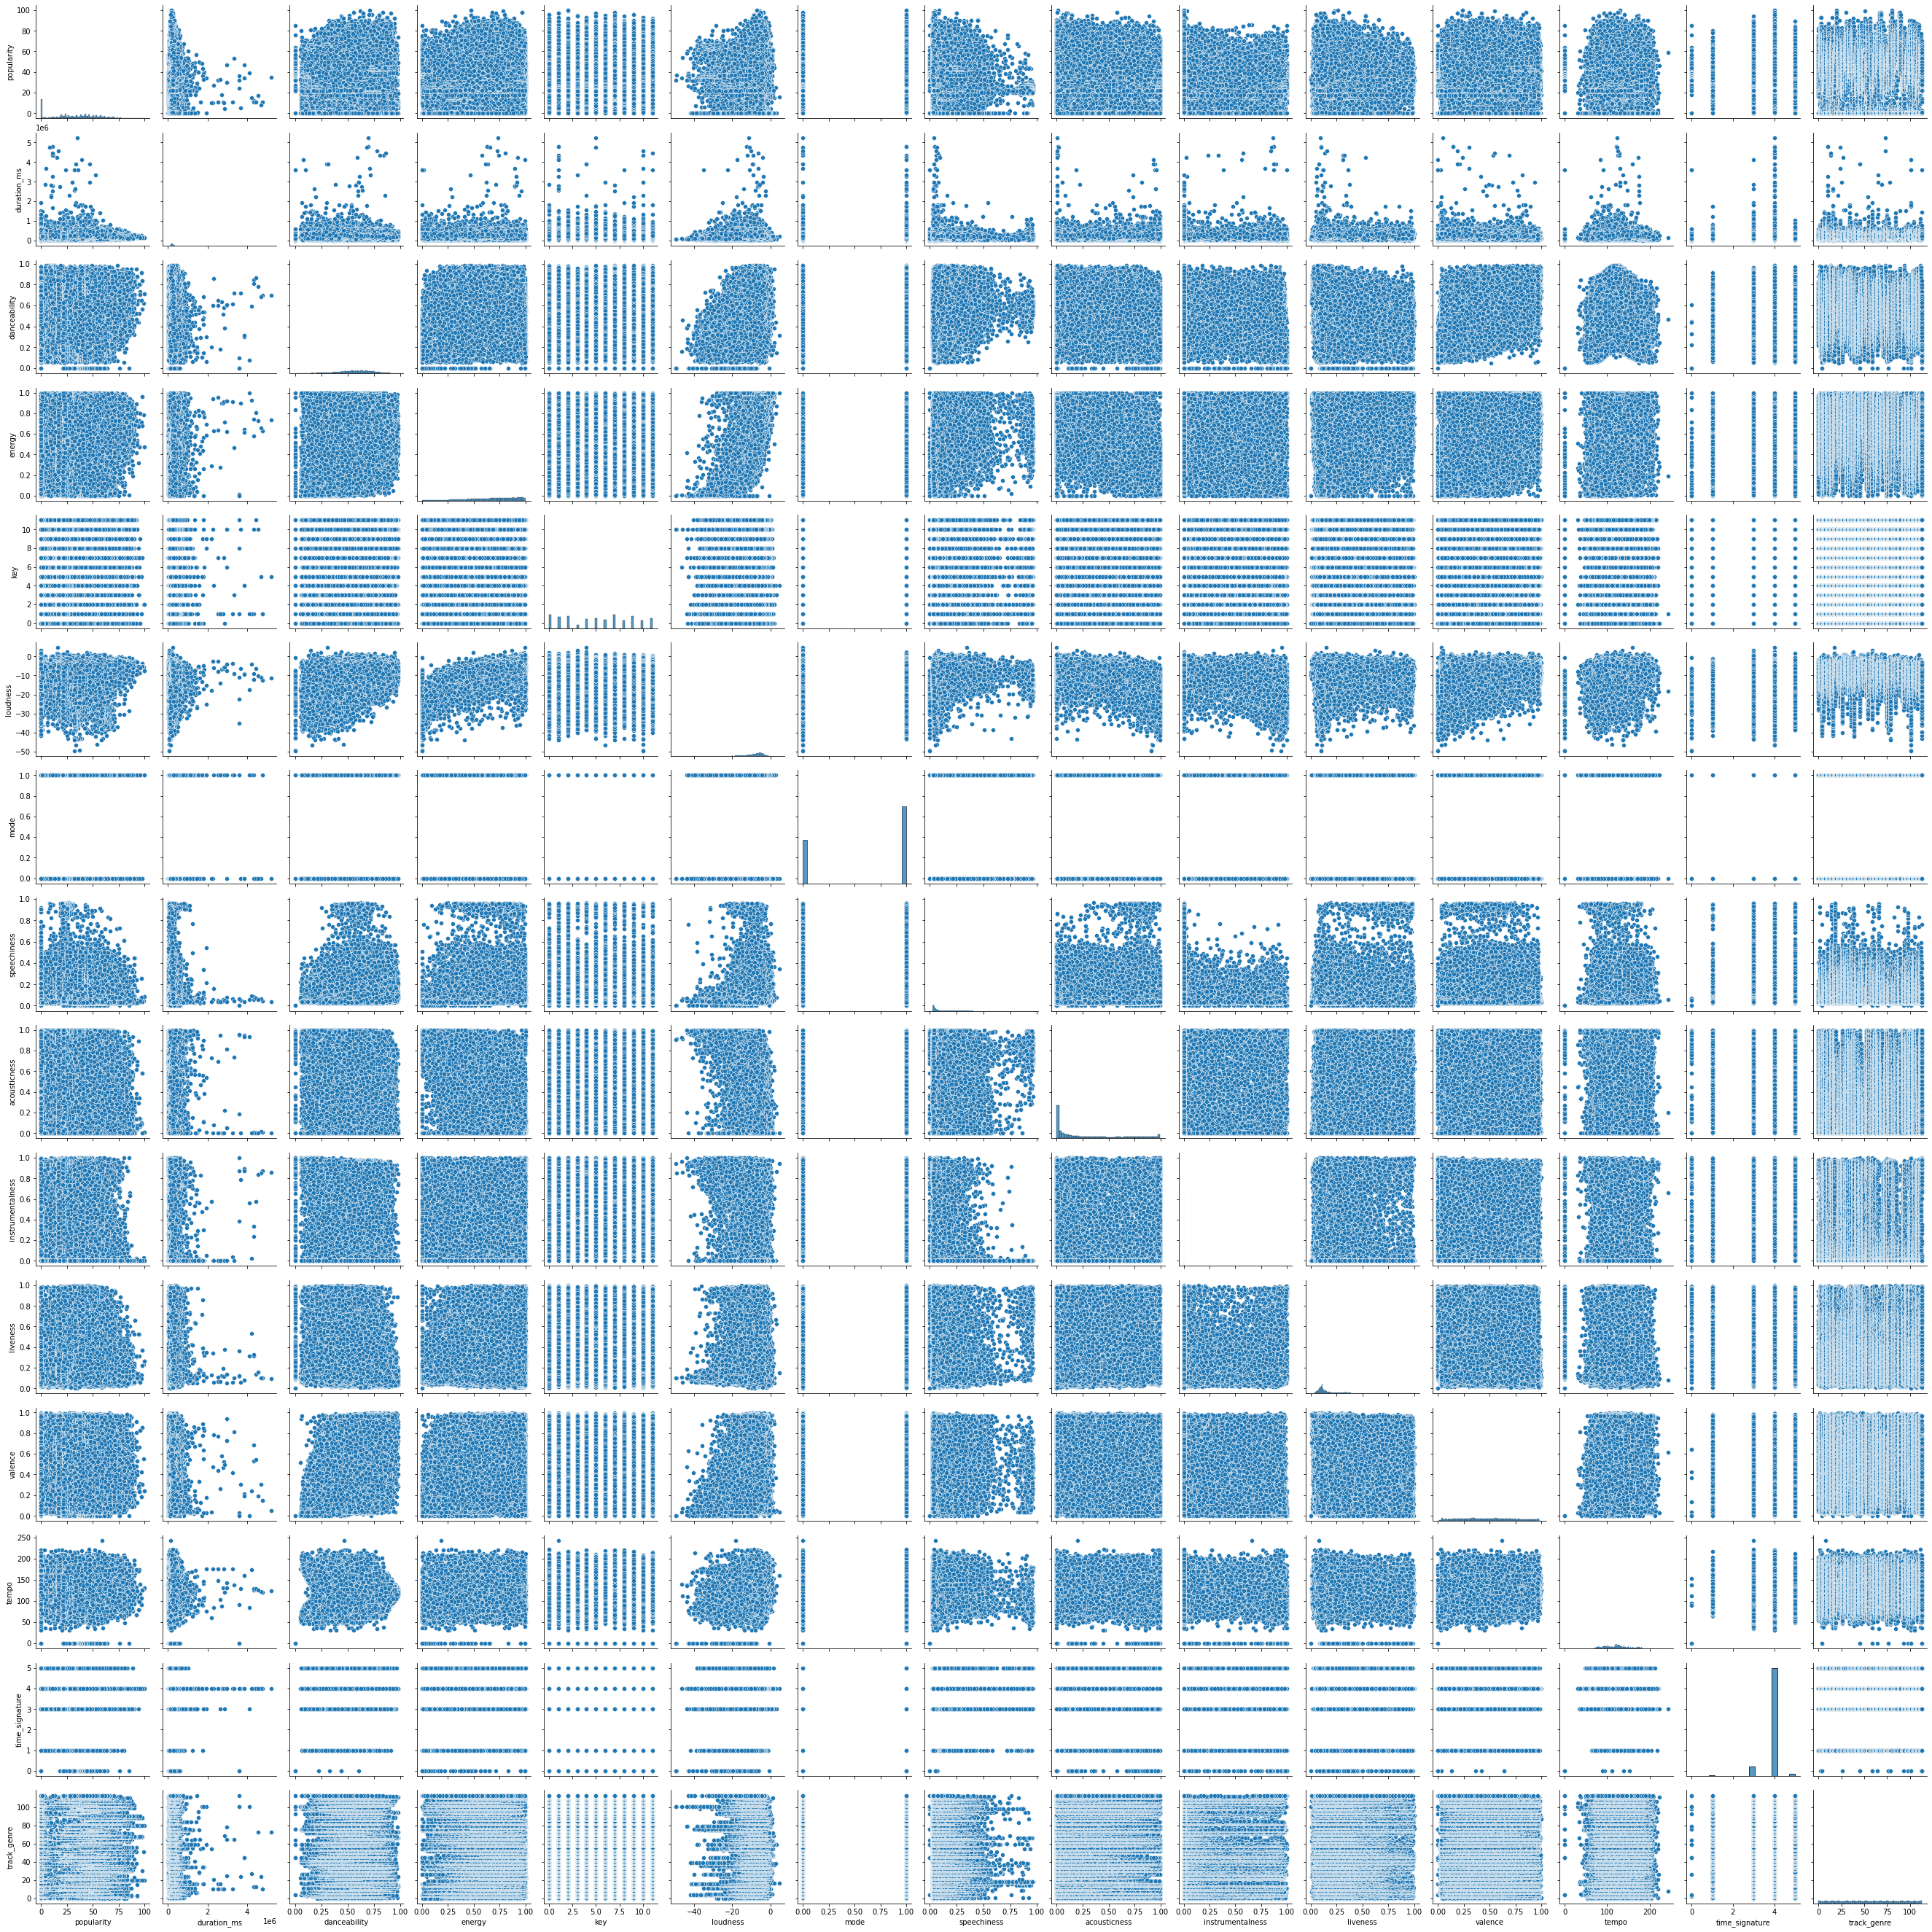

In [ ]:
sns.pairplot(df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')],palette = ["#8000ff","#da8829"])

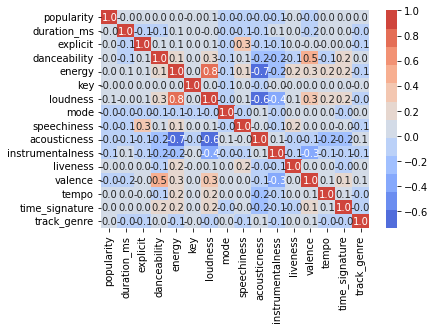

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap = sns.color_palette("coolwarm", 12))

# Model dev

In [ ]:
X = df.loc[:,df.columns != 'popularity'].values
y = df['popularity'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
XGBreg = XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1)
ridge_model = linear_model.Ridge(alpha=.5)
lasso_model = linear_model.Lasso(alpha =.1)
tr = tree.DecisionTreeRegressor()
bayridge_model = linear_model.BayesianRidge()
lm = linear_model.LinearRegression()
poly_list = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2,4)]
prm_list = [linear_model.LinearRegression() for i in range(2,4)]

In [ ]:
def model_metrics(model, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds}

In [ ]:
def poly_model_metrics(models, poly_list, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    metrics_list = []
    for i in range(len(models)):
        start = datetime.now()
        poly_features = poly_list[i].fit_transform(X_train)
        models[i].fit(poly_features, y_train)
        y_pred = models[i].predict(poly_list[i].fit_transform(X_test))
        mse = np.round(mean_squared_error(y_test, y_pred), decimals)
        r2 = np.round(r2_score(y_test, y_pred), decimals)
        metrics_list.append(
            {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds})
    return metrics_list


In [ ]:
poly_models = poly_model_metrics(prm_list, poly_list, X_test, y_test)
poly_results = pd.DataFrame(
    [
        {'mean_squared_error': metrics['mean_squared_error'], 'R-Squared': metrics['R-Squared'], 'time': metrics['time']} 
        for metrics in poly_models
    ],
    index = [f'PolynomiyalRegression_{i+2}_degrees' for i in range(len(poly_models))]) \
.reset_index() \
.rename(columns = {'index': 'model'})

In [ ]:
#New dataframe to store results of different models

results = pd.DataFrame(
    [
        model_metrics(XGBreg, X_test, y_test),
        model_metrics(ridge_model, X_test, y_test),
        model_metrics(lasso_model, X_test, y_test),
        model_metrics(tr, X_test, y_test),
        model_metrics(bayridge_model, X_test, y_test),
        model_metrics(lm, X_test, y_test)
    ], 
    index = ['XGBRegressor', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'BayesianRidge', 'LinearRegression']) \
.reset_index() \
.rename(columns={'index':'model'})

[12:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Selecting the best model

In [ ]:
results.sort_values(['mean_squared_error', 'R-Squared', 'time'],
              ascending = [True, False, True])

model  mean_squared_error  R-Squared  time
0           XGBRegressor           265.93681    0.46600   131
3  DecisionTreeRegressor           471.71273    0.05281     1
5       LinearRegression           484.55812    0.02702     0
1                  Ridge           484.55830    0.02702     0
4          BayesianRidge           484.56537    0.02700     0
2                  Lasso           488.06187    0.01998     0

Text(0.5, 1.0, 'Model Performance based on Mean Squared Error')

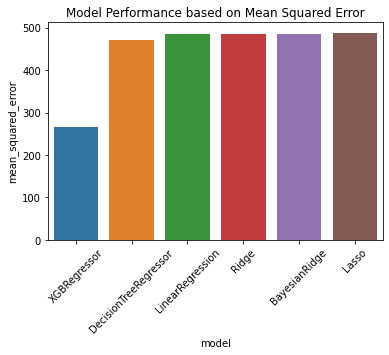

In [ ]:
results = results.sort_values('mean_squared_error', ascending = True)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['mean_squared_error']).set_title('Model Performance based on Mean Squared Error')

Text(0.5, 1.0, 'Model Performance based on R-Squared')

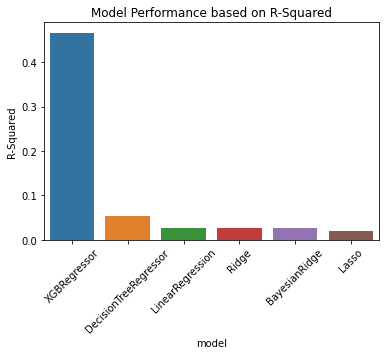

In [ ]:
results = results.sort_values('R-Squared', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['R-Squared']).set_title('Model Performance based on R-Squared')


In [ ]:
y_pred = XGBreg.predict(X_test)

In [ ]:
y_pred

array([53.79497 , 22.820852, 47.18519 , ..., 46.521797, 45.03918 ,
       35.269653], dtype=float32)

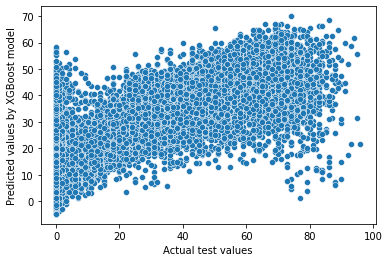

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='Actual test values', ylabel='Predicted values by XGBoost model')
plt.show()

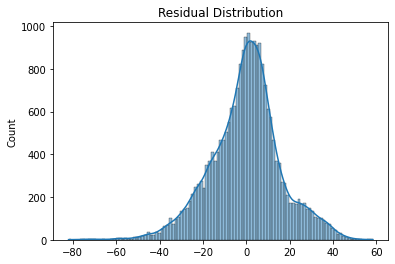

In [ ]:
ax = sns.histplot(y_pred - y_test, kde = True)
ax.set(title='Residual Distribution')
plt.show()

# Feature importance



Here we want to see which features in our dataset explain most of the variance of the target variable, popularity.




In [ ]:
xgb_model = XGBreg.fit(X_train, y_train)

[12:58:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_ftr_imp = xgb_model.feature_importances_

In [ ]:
feature_importances_df = pd.DataFrame(xgb_ftr_imp, index = df.loc[:,df.columns != 'popularity'].columns) \
.reset_index() \
.rename(columns = {0: 'importance', 'index': 'feature'}) \
.sort_values('importance', ascending = False)

Text(0.5, 1.0, 'Importance of features for predicting Popularity using XGBoost')

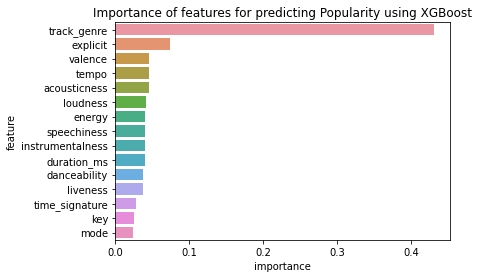

In [ ]:
sns.barplot(y=feature_importances_df['feature'], x = feature_importances_df['importance']).set_title('Importance of features for predicting Popularity using XGBoost')

# Conclusion

We could see that even our best model, the xgboost regression model, has a relatively low R-squared value so there are a couple of things we could try to improve that.